# Detection de vissage

In [2]:
import cv2
import numpy
import matplotlib.pyplot as plt
import os

## A partir d'une image

On commence par chager l'image que l'on veut analyser.

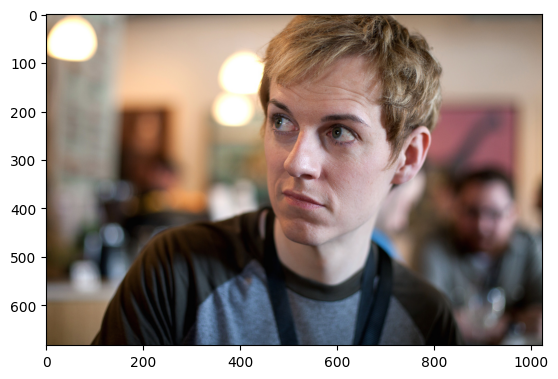

Dimensions de l'image : (683, 1024, 3)


In [3]:
# Charger l'image
image = cv2.imread('../assets/visage.jpg')

# Vérifier si l'image a été chargée
if image is not None:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    # Vérifier les dimensions de l'image
    print('Dimensions de l\'image :', image.shape)
else:
    print("Failed to load the image.")

Ensuite on la change en noir et blanc pour faciliter la detection.

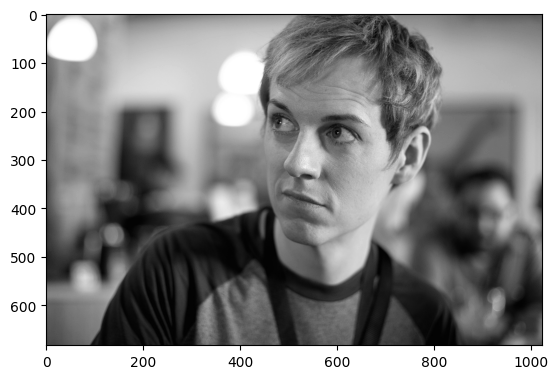

In [4]:
# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Afficher l'image en niveaux de gris
plt.imshow(gray_image, cmap='gray')
plt.show()

Puis on commence le code pour la detection.

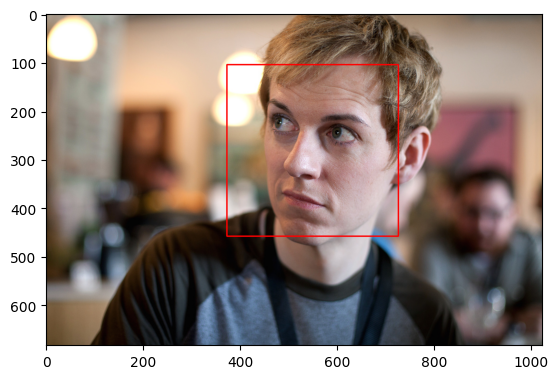

In [5]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

# Pour chaque visage détecté
for (x, y, w, h) in face:
    # Dessiner un rectangle rouge avec une épaisseur de 2
    image_rectangle = cv2.rectangle(image.copy(), (x, y), (x+w, y+h), (0, 0, 255), 2)

# Afficher l'image
plt.imshow(cv2.cvtColor(image_rectangle, cv2.COLOR_BGR2RGB))
plt.show()

L'utilisation de ces hyperparamètres dans la méthode detectMultiScale pour la détection de visages avec OpenCV est motivée par les raisons suivantes :

`gray_image` : La détection de visages est souvent effectuée sur des images en niveaux de gris plutôt que sur des images en couleur. Cela réduit la complexité des données et améliore la vitesse de traitement, car l'algorithme n'a pas à traiter les informations de couleur qui ne sont pas nécessaires pour la détection de visages.

`scaleFactor=1.1` : Ce paramètre spécifie à quel point l'image est réduite à chaque échelle de l'image. Une valeur de 1.1 indique que l'on réduit l'image de 10% à chaque fois qu'elle est mise à l'échelle. Un petit facteur entraîne une détection plus précise mais est plus lent et peut potentiellement générer plus de faux positifs.

`minNeighbors=5` : Ce paramètre spécifie le nombre minimum de voisins qu'un rectangle candidat doit avoir pour le garder comme résultat positif. En augmentant ce nombre, vous diminuez le nombre de faux positifs mais augmentez également le risque de manquer des détections.

`minSize=(40, 40)` : Ce paramètre définit la taille minimale de l'objet à détecter. Les objets plus petits que cette taille seront ignorés. Cela peut être utile pour éviter de détecter de petits visages qui pourraient être en arrière-plan ou de fausses détections. La taille de (40, 40) est souvent un bon compromis pour détecter des visages dans une image sans être trop restrictif.

Ces hyperparamètres sont choisis pour équilibrer la précision de la détection, la vitesse de traitement et la réduction des faux positifs. Le choix spécifique de ces valeurs peut varier en fonction des exigences spécifiques de votre application et des caractéristiques des images avec lesquelles vous travaillez. Il est souvent utile d'expérimenter avec ces paramètres pour trouver le meilleur ensemble pour votre cas d'utilisation spécifique.

In [6]:
def detect_image(path_image, scale, minNeighbors, minSize):
    # Charger l'image
    image = cv2.imread(path_image)

    # Vérifier si l'image a été chargée
    if image is not None:
        #? plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        #? plt.show()
        print('Dimensions de l\'image :', image.shape)
    else:
        return "Erreur : L'image n'a pas pu être chargée."

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Afficher l'image en niveaux de gris
    #? plt.imshow(gray_image, cmap='gray')
    #? plt.show()

    face_classifier = cv2.CascadeClassifier(
        cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
    )

    face = face_classifier.detectMultiScale(
        gray_image, scaleFactor=scale, minNeighbors=minNeighbors, minSize=minSize
    )

    if len(face) > 0:
        print('Visage(s) détecté(s) :', len(face))
        image_rectangle = image.copy()
        coordonnees_visage = []

        # Pour chaque visage détecté
        for (x, y, w, h) in face:
            # Dessiner un rectangle rouge avec une épaisseur de 2
            image_rectangle = cv2.rectangle(image_rectangle, (x, y), (x+w, y+h), (0, 0, 255), 2)
            print('Coordonnées du visage :', (x, y, w, h))
            coordonnees_visage.append((x, y, w, h))
    else:
        print('Aucun visage détecté.')
        x,y,w,h = 0,0,0,0
        coordonnees_visage = [(x, y, w, h)]
        image_rectangle = image.copy()

    # Afficher l'image
    plt.imshow(cv2.cvtColor(image_rectangle, cv2.COLOR_BGR2RGB))
    plt.show()
    return path_image, len(face), coordonnees_visage

## Amelioration des hyperparametre

In [ ]:
gred_seach_cv

## A partir d'un webcam

In [7]:
#Lire à partir de la WebCam
video_capture = cv2.VideoCapture(0)

# Charger le classificateur en cascade Haar pour les visages
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Capturer le flux vidéo de la webcam
cap = cv2.VideoCapture(0)

while True:
    # Lire une image du flux vidéo
    ret, img = cap.read()

    # Convertir en niveaux de gris
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Détecter les visages
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Dessiner un rectangle autour de chaque visage détecté
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    # Afficher l'image résultante
    cv2.imshow('img',img)

    # Quitter si 'q' est pressé
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libérer la capture vidéo et fermer toutes les fenêtres
cap.release()
cv2.destroyAllWindows()

## Evaluer les performances

In [8]:
def calculer_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    # Calculer les coordonnées des zones d'intersection
    xi1 = max(x1, x2)
    yi1 = max(y1, y2)
    xi2 = min(x1 + w1, x2 + w2)
    yi2 = min(y1 + h1, y2 + h2)
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)

    # Calculer les zones des boîtes englobantes
    box1_area = w1 * h1
    box2_area = w2 * h2

    # Calculer l'IoU
    union_area = box1_area + box2_area - inter_area
    iou = inter_area / union_area

    return iou

In [9]:
def filtrer_carres_proches(liste_coordonnees, seuil_proximite):
    """
    Filtrer les carrés trop proches en ne conservant que le plus grand lorsque deux carrés sont à moins
    d'une certaine distance l'un de l'autre.

    :param liste_coordonnees: Liste des coordonnées des carrés sous la forme [(x, y, largeur, hauteur), ...]
    :param seuil_proximite: Distance maximale pour considérer deux carrés comme étant "proches"
    :return: Liste filtrée des coordonnées
    """
    def calculer_surface(carre):
        _, _, largeur, hauteur = carre
        return largeur * hauteur

    # Trier les carrés par leur position x, puis y pour la comparaison
    liste_triee = sorted(liste_coordonnees, key=lambda x: (x[0], x[1]))

    # Liste pour stocker les carrés après filtrage
    resultat_filtré = []

    while liste_triee:
        carre = liste_triee.pop(0)
        carres_a_comparer = []

        # Trouver les carrés proches du carré actuel
        for autre_carre in liste_triee:
            if abs(carre[0] - autre_carre[0]) <= seuil_proximite and abs(carre[1] - autre_carre[1]) <= seuil_proximite:
                carres_a_comparer.append(autre_carre)

        # Comparer les surfaces des carrés proches et ne garder que le plus grand
        for carre_proche in carres_a_comparer:
            if calculer_surface(carre) >= calculer_surface(carre_proche):
                # Si le carré actuel est plus grand, on le garde et on retire le plus petit
                liste_triee.remove(carre_proche)
            else:
                # Si le carré proche est plus grand, on remplace le carré actuel par le plus grand
                carre = carre_proche
                liste_triee.remove(carre_proche)

        resultat_filtré.append(carre)

    return resultat_filtré

Image choisie : ../assets/archive/images/train/ea094917661bac7c.jpg
Texte associé : ../assets/archive/labels2/ea094917661bac7c.txt
Contenu du fichier texte :
Human face 204.16 161.84408 314.24 310.89396
Human face 636.16 143.29232 714.88 296.82

Dimensions de l'image : (680, 1024, 3)
Visage(s) détecté(s) : 4
Coordonnées du visage : (104, 546, 59, 59)
Coordonnées du visage : (898, 120, 105, 105)
Coordonnées du visage : (65, 439, 143, 143)
Coordonnées du visage : (220, 150, 164, 164)


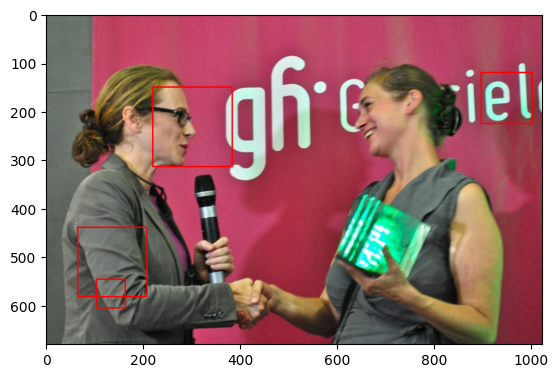

IoU : 0.0
(204.16, 161.84408, 110.08000000000001, 149.04988) (65, 439, 143, 143)
 
IoU : 0.0
(636.16, 143.29232, 78.72000000000003, 153.52768) (220, 150, 164, 164)
 


In [11]:
path_images = '../assets/archive/images/train/'
path_texts = '../assets/archive/labels2/'

# Choisir une image aléatoire dans le dossier
liste_images = os.listdir(path_images)
liste_text = os.listdir(path_texts)

index = numpy.random.randint(0, len(liste_images))
#index = 0

path_image = os.path.join(path_images, liste_images[index])
path_text = os.path.join(path_texts, liste_images[index].replace('.jpg', '.txt'))
print('Image choisie :', path_image)
print('Texte associé :', path_text)

# Afficher le contenue du fichier text
with open(path_text, 'r', encoding='utf-8') as fichier:
    # Lire le contenu du fichier
    contenu = fichier.read()
    # Afficher le contenu
    print('Contenu du fichier texte :')
    print(contenu)


result = detect_image(path_image, 1.1, 5, (40, 40))
result_trie = sorted(result[2], key=lambda x: x[0])

result_filtre = filtrer_carres_proches(result_trie, 200)

_box = []

for lines in contenu.split('\n'):
    if lines == '':
        continue
    lines = lines.replace('Human face','')
    lines = lines.split(' ')
    x, y, w, h = float(lines[1]), float(lines[2]), float(lines[3]), float(lines[4])
    #print((x, y, w-x, h-y))
    _box.append((x, y, w-x, h-y))

_box_trie = sorted(_box, key=lambda x: x[0])

if len(_box_trie) > len(result_filtre):
    value = len(result_filtre)
else:
    value = len(_box_trie)

for box in range(value):
    iou = calculer_iou(_box_trie[box], result_filtre[box])
    print('IoU :', iou)
    print(_box_trie[box], result_filtre[box])
    print(" ")